In [27]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt

spark = SparkSession.builder \
    .appName("CSV to Plot") \
    .getOrCreate()

csv_file_path = 'capturas_2015-2020_año2015.csv'
df_2015 = spark.read.csv(csv_file_path, header=True, inferSchema=True)

csv_file_path = 'capturas_2015-2020_año2017.csv'
df_2017 = spark.read.csv(csv_file_path, header=True, inferSchema=True)

csv_file_path = 'capturas_2015-2020_año2020.csv'
df_2020 = spark.read.csv(csv_file_path, header=True, inferSchema=True)


df_2015.show()

+----------+--------+---------+--------------------+---------+--------------------+--------------------+-------+--------------------+-------------+---------------------+--------------------+---------------------+---+------+
|     Fecha| Latitud| Longitud|           Ubicacion|Municipio|           Comunidad|           Productor|Cultivo|           Fenologia|Superficie_ha|No_Trampas_Instaladas|No_Trampas_Revisadas|No_DiaphorinasXtrampa|Mes|Semana|
+----------+--------+---------+--------------------+---------+--------------------+--------------------+-------+--------------------+-------------+---------------------+--------------------+---------------------+---+------+
|2015-01-22|24.11564|-99.03734|177_THUE05-28-030...|  PADILLA|  Ej. Marte R. Gomez|MARTINEZ_ZAMBRANO...|  LIMÓN|DESARROLLO (creci...|         25.0|                  0.0|                 1.0|                  0.0|1.0|   4.0|
|2015-01-29|24.11564|-99.03734|177_THUE05-28-030...|  PADILLA|  Ej. Marte R. Gomez|MARTINEZ_ZAMBRANO...|

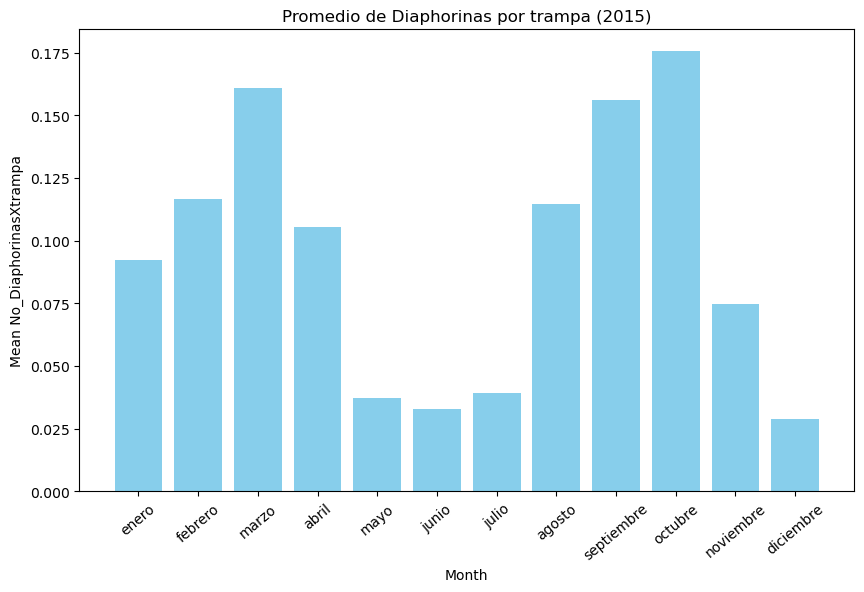

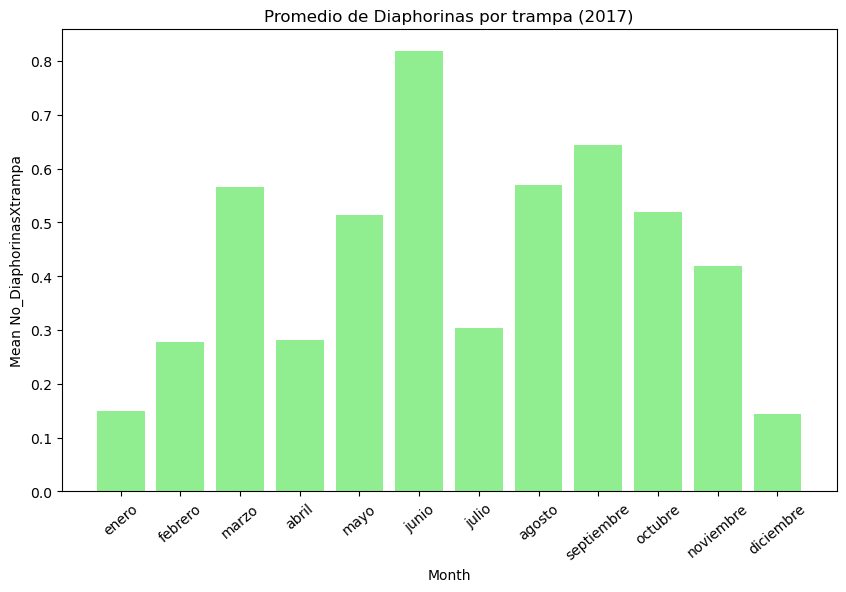

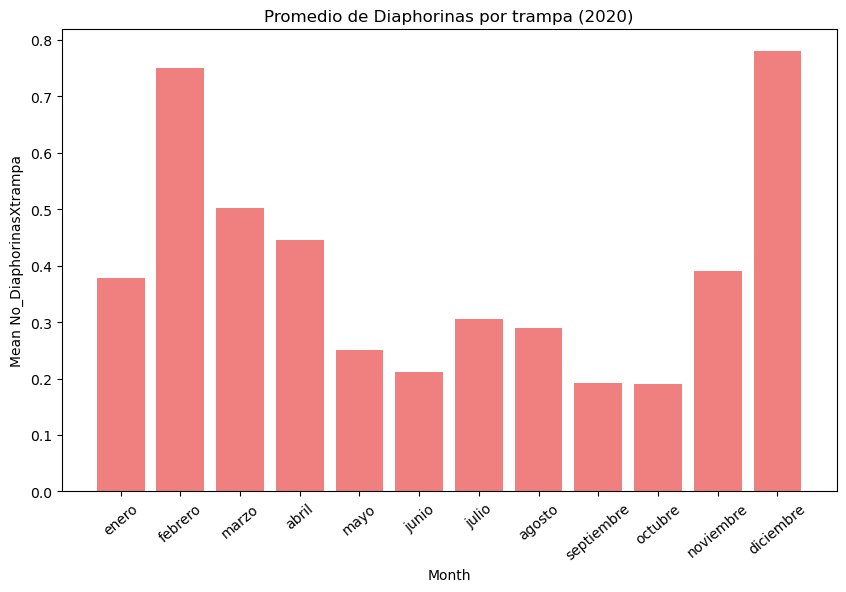

In [32]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean, col
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("DiaphorinasAnalysis").getOrCreate()

df_2015 = df_2015.na.drop(subset=['Fecha'])
month_names = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 
               'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
monthly_mean = df_2015.withColumn('Mes',  col('Mes')) \
                       .groupBy('Mes') \
                       .agg(mean('No_DiaphorinasXtrampa').alias('mean_No_DiaphorinasXtrampa'))

monthly_mean_pd = monthly_mean.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(monthly_mean_pd['Mes'], monthly_mean_pd['mean_No_DiaphorinasXtrampa'], color='skyblue')
plt.title('Promedio de Diaphorinas por trampa (2015)')
plt.xlabel('Month')
plt.ylabel('Mean No_DiaphorinasXtrampa')
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=40)
plt.show()


df_2017 = df_2017.na.drop(subset=['Fecha'])
month_names = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 
               'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
monthly_mean = df_2017.withColumn('Mes',  col('Mes')) \
                       .groupBy('Mes') \
                       .agg(mean('No_DiaphorinasXtrampa').alias('mean_No_DiaphorinasXtrampa'))

monthly_mean_pd = monthly_mean.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(monthly_mean_pd['Mes'], monthly_mean_pd['mean_No_DiaphorinasXtrampa'], color='lightgreen')
plt.title('Promedio de Diaphorinas por trampa (2017)')
plt.xlabel('Month')
plt.ylabel('Mean No_DiaphorinasXtrampa')
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=40)
plt.show()


df_2020 = df_2020.na.drop(subset=['Fecha'])
month_names = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 
               'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
monthly_mean = df_2020.withColumn('Mes',  col('Mes')) \
                       .groupBy('Mes') \
                       .agg(mean('DiaphorinaXTrampa').alias('mean_No_DiaphorinasXtrampa'))

monthly_mean_pd = monthly_mean.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(monthly_mean_pd['Mes'], monthly_mean_pd['mean_No_DiaphorinasXtrampa'], color='lightcoral')
plt.title('Promedio de Diaphorinas por trampa (2020)')
plt.xlabel('Month')
plt.ylabel('Mean No_DiaphorinasXtrampa')
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=40)
plt.show()



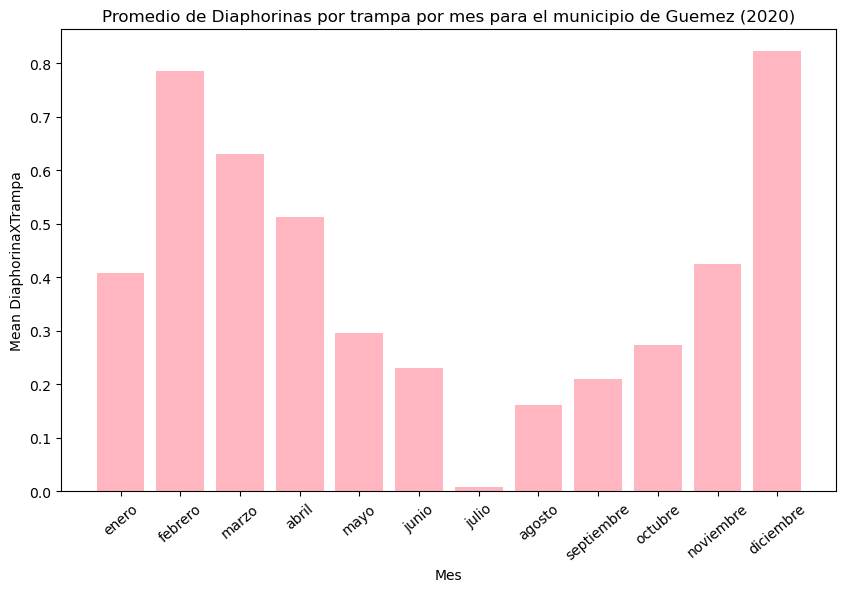

In [16]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean, col, month
import matplotlib.pyplot as plt

df_2020 = df_2020.na.drop(subset=['Fecha'])
df_2020_guemez = df_2020.filter(col('Municipio') == 'GUEMEZ')

month_names = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 
               'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
monthly_mean = df_2020_guemez.withColumn('Mes', col('Mes')) \
                               .groupBy('Mes') \
                               .agg(mean('DiaphorinaXTrampa').alias('mean_DiaphorinaXTrampa'))

monthly_mean_pd = monthly_mean.orderBy('Mes').toPandas()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(monthly_mean_pd['Mes'], monthly_mean_pd['mean_DiaphorinaXTrampa'], color='lightpink')
plt.title('Promedio de Diaphorinas por trampa por mes para el municipio de Guemez (2020)')
plt.xlabel('Mes')
plt.ylabel('Mean DiaphorinaXTrampa')
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=40)
plt.show()


In [20]:
from pyspark.sql.functions import month, col, mean, variance, sum as _sum

spark = SparkSession.builder.appName("DiaphorinasAnalysis2015").getOrCreate()

csv_file_path = 'capturas_2015-2020_año2015.csv'
df_2015 = spark.read.csv(csv_file_path, header=True, inferSchema=True)

df_2015 = df_2015.withColumn('Fecha', col('Fecha').cast('date'))
df_2015 = df_2015.withColumn('Month', month(col('Mes')))

summary_df = df_2015.groupBy('Month', 'Ubicacion') \
                     .agg(mean('No_DiaphorinasXtrampa').alias('mean_No_DiaphorinasXtrampa'))

coef_disp = summary_df.groupBy('Month') \
                       .agg((variance(col('mean_No_DiaphorinasXtrampa')) / mean(col('mean_No_DiaphorinasXtrampa'))).alias('Id'))

coef_cx = summary_df.groupBy('Month') \
                     .agg(((variance(col('mean_No_DiaphorinasXtrampa')) / mean(col('mean_No_DiaphorinasXtrampa')) - 1) / 
                            (_sum('mean_No_DiaphorinasXtrampa') - 1)).alias('Cx'))

monthly_summary = coef_disp.join(coef_cx, on='Month', how='inner').orderBy('Month')
monthly_summary.show(20)


+-----+------------------+--------------------+
|Month|                Id|                  Cx|
+-----+------------------+--------------------+
|    1| 0.983413740730814|-0.00438403328700...|
|    2| 1.300030506748244|3.304604021091261E-4|
|    3|1.6954627473218902|5.296544284847378E-4|
|    4|0.8782011426238684|-1.71463162351138...|
|    5|0.7379247983085045|-8.80037614813619...|
|    6|1.3380073755297155|0.001330213992639...|
|    7|1.6819677310122505|0.002132481960638688|
|    8| 2.537507480885721|0.001734454826426...|
|    9|3.0042876615209915|0.001563915205036...|
|   10| 4.523983641175644|0.002683100077033...|
|   11| 2.004130653613004|0.001660177437772...|
|   12|2.1768319112729624|0.003988584684877031|
+-----+------------------+--------------------+



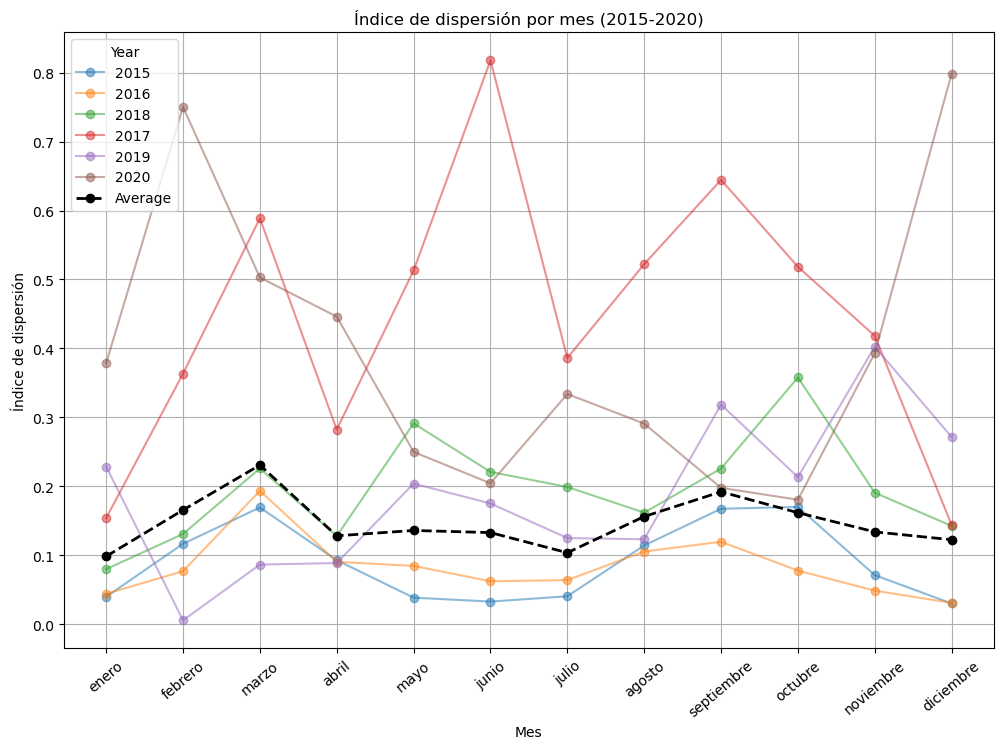

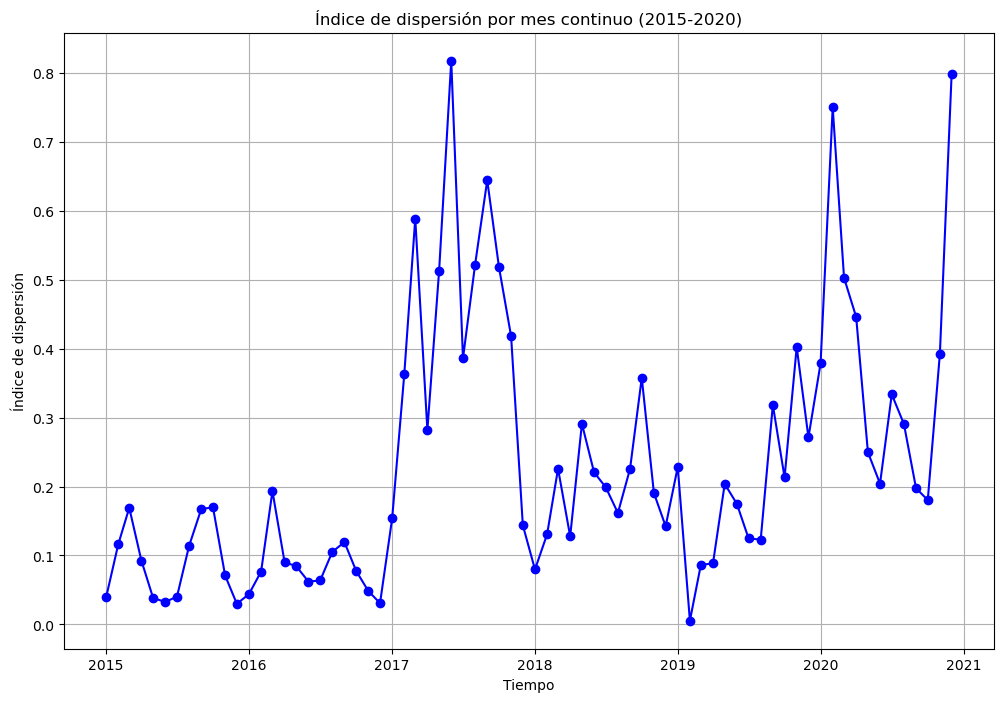

In [40]:
from pyspark.sql.functions import mean, month, year, col, to_date


df = spark.read.csv('capturas_2015-2020_concat_version.csv', header=True, inferSchema=True)
df = df.withColumn('Fecha', to_date(col('Fecha'))) \
       .withColumn('Year', year(col('Fecha'))) \
       .withColumn('Month', month(col('Fecha')))

df_monthly = df.groupBy('Month') \
                .agg(mean('No_DiaphorinasXtrampa').alias('Mean_No_DiaphorinasXtrampa')) \
                .orderBy('Month')

df_monthly_pd = df_monthly.toPandas()

plt.figure(figsize=(12, 8))
for year_value in df.select('Year').distinct().rdd.flatMap(lambda x: x).collect():
    df_yearly = df.filter(col('Year') == year_value) \
                  .groupBy('Month') \
                  .agg(mean('No_DiaphorinasXtrampa').alias('Mean_No_DiaphorinasXtrampa')) \
                  .orderBy('Month')
    df_yearly_pd = df_yearly.toPandas()
    plt.plot(df_yearly_pd['Month'], df_yearly_pd['Mean_No_DiaphorinasXtrampa'], marker='o', label=str(year_value), alpha=0.5)

df_avg = df.groupBy('Month') \
            .agg(mean('No_DiaphorinasXtrampa').alias('Mean_No_DiaphorinasXtrampa')) \
            .orderBy('Month')
df_avg_pd = df_avg.toPandas()
plt.plot(df_avg_pd['Month'], df_avg_pd['Mean_No_DiaphorinasXtrampa'], marker='o', color='black', linestyle='--', label='Average', linewidth=2)

plt.title('Índice de dispersión por mes (2015-2020)')
plt.xlabel('Mes')
plt.ylabel('Índice de dispersión')
plt.xticks(ticks=range(1, 13), labels=['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
                                           'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'], rotation=40)
plt.grid(True)
plt.legend(title='Year')
plt.show()

df_continuous = df.groupBy('Year', 'Month') \
                  .agg(mean('No_DiaphorinasXtrampa').alias('Mean_No_DiaphorinasXtrampa')) \
                  .orderBy('Year', 'Month')

df_continuous_pd = df_continuous.toPandas()
df_continuous_pd['Time'] = pd.to_datetime(df_continuous_pd['Year'].astype(str) + '-' + df_continuous_pd['Month'].astype(str).str.zfill(2))

plt.figure(figsize=(12, 8))
plt.plot(df_continuous_pd['Time'], df_continuous_pd['Mean_No_DiaphorinasXtrampa'], marker='o', color='b')
plt.title('Índice de dispersión por mes continuo (2015-2020)')
plt.xlabel('Tiempo')
plt.ylabel('Índice de dispersión')
plt.grid(True)
plt.show()


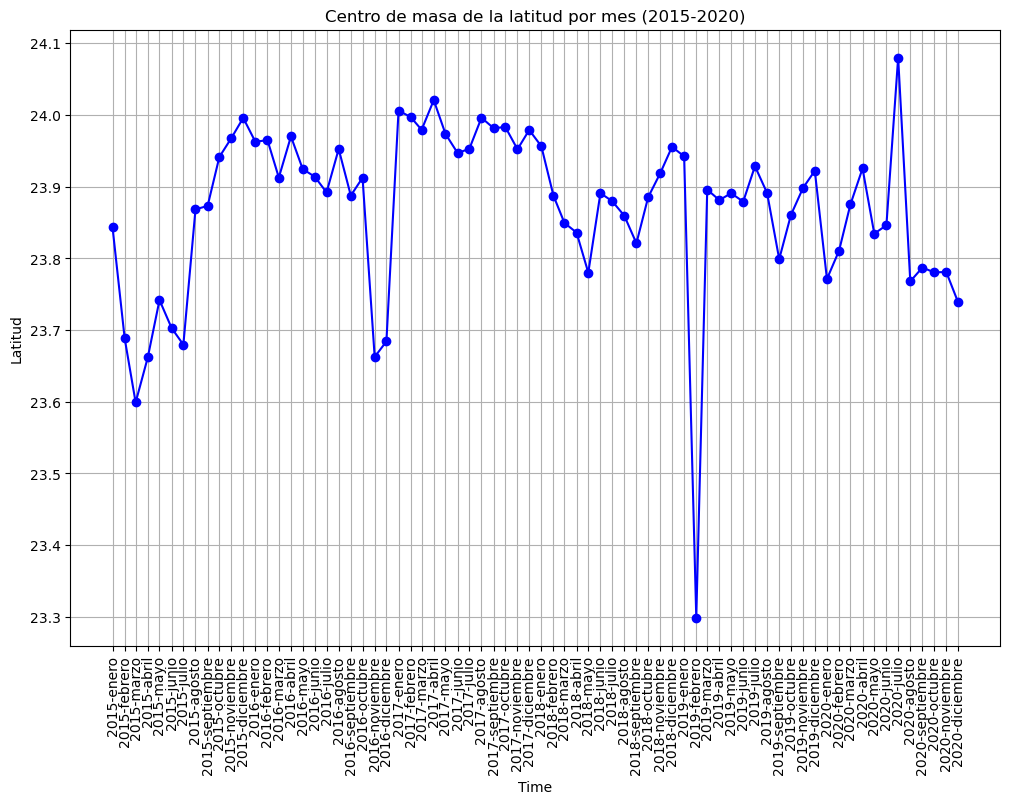

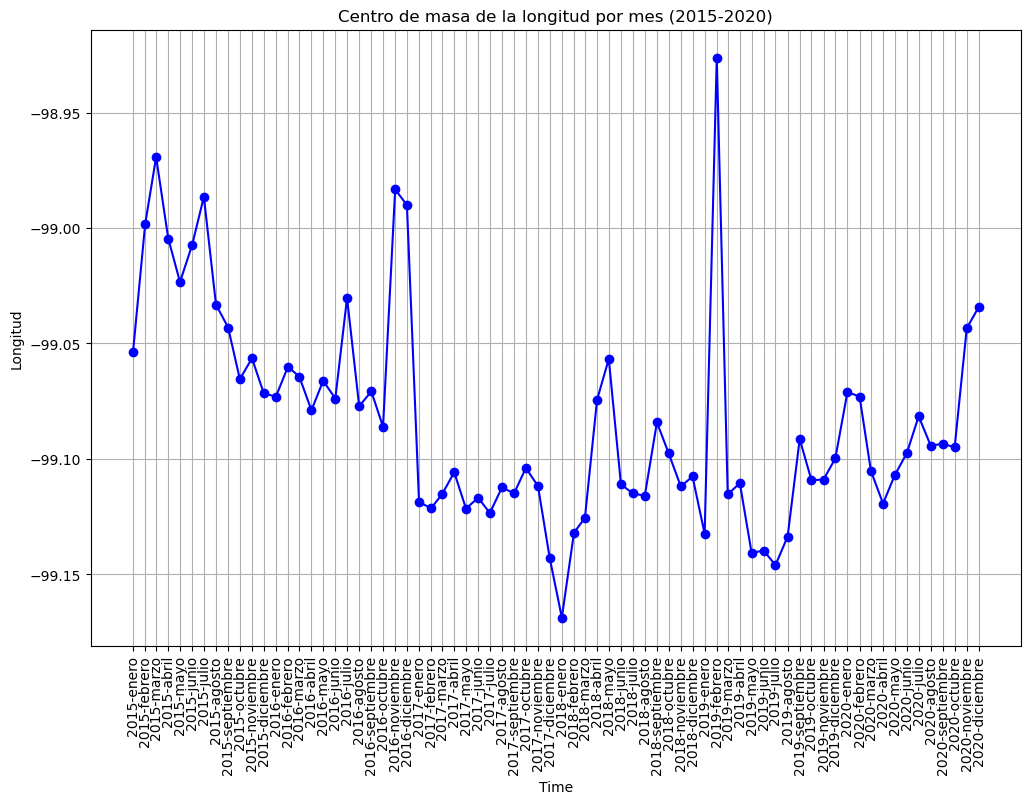

In [38]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as spark_sum, month, year
import matplotlib.pyplot as plt
import pandas as pd

spark = SparkSession.builder.appName("CentroDeMasaAnalysis").getOrCreate()
df = spark.read.csv('capturas_2015-2020_concat_version.csv', header=True, inferSchema=True)

df = df.withColumn('Fecha', col('Fecha').cast('date'))
df = df.withColumn('Month', month(col('Fecha')))
df = df.withColumn('Year', year(col('Fecha')))

cm_latitud_y = df.groupBy('Year', 'Month') \
    .agg((spark_sum(col('No_DiaphorinasXtrampa') * col('Latitud')) / spark_sum(col('No_DiaphorinasXtrampa'))).alias('cm_lat_y'))

cm_longitud_x = df.groupBy('Year', 'Month') \
    .agg((spark_sum(col('No_DiaphorinasXtrampa') * col('Longitud')) / spark_sum(col('No_DiaphorinasXtrampa'))).alias('cm_long_x'))

cm_latitud_y_pd = cm_latitud_y.toPandas().sort_values(by=['Year', 'Month'])
cm_longitud_x_pd = cm_longitud_x.toPandas().sort_values(by=['Year', 'Month'])

cm_latitud_y_pd['Time'] = pd.to_datetime(cm_latitud_y_pd['Year'].astype(str) + '-' + cm_latitud_y_pd['Month'].astype(str).str.zfill(2))
cm_longitud_x_pd['Time'] = pd.to_datetime(cm_longitud_x_pd['Year'].astype(str) + '-' + cm_longitud_x_pd['Month'].astype(str).str.zfill(2))

plt.figure(figsize=(12, 8))
plt.plot(cm_latitud_y_pd['Time'], cm_latitud_y_pd['cm_lat_y'], marker='o', color='b')
plt.title('Centro de masa de la latitud por mes (2015-2020)')
plt.xlabel('Time')
plt.ylabel('Latitud')
plt.xticks(ticks=cm_latitud_y_pd['Time'], labels=cm_latitud_y_pd['Year'].astype(str) + '-' + cm_latitud_y_pd['Month'].apply(lambda x: month_names[x-1]), rotation=90)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(cm_longitud_x_pd['Time'], cm_longitud_x_pd['cm_long_x'], marker='o', color='b')
plt.title('Centro de masa de la longitud por mes (2015-2020)')
plt.xlabel('Time')
plt.ylabel('Longitud')
plt.xticks(ticks=cm_longitud_x_pd['Time'], labels=cm_longitud_x_pd['Year'].astype(str) + '-' + cm_longitud_x_pd['Month'].apply(lambda x: month_names[x-1]), rotation=90)
plt.grid(True)
plt.show()
